In [ ]:
import numpy as np
from scipy.special import expit
from numpy import logaddexp
from glqp import GLQP,SolverSettings
from glqp_tests.build_problems import build_random_logistic,build_logistic_lasso
import matplotlib.pyplot as plt
from scipy.sparse import csc_array,diags_array,csr_array,block_array
from numpy.random import default_rng

## Solve an inequality constrained logistic regression problem

In [2]:
f,A,Q,C,c,b = build_random_logistic(m = 10000,n = 500,k = 100,density=0.1, seed = 2)
problem = GLQP(f=f,A=A,Q=Q,b=b,C=C,c=c)
x,results = problem.solve()

────────────────────────────────────────────────────────────────────────────────────────────────────────
| GLQP | Variables: 500  │ Rows in A: 10,000 │ Equality Constraints: 0    │ Inequality Constraints: 100 
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │ lin_rel_res │
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │  6.931e+05 │  1.84e+03 │  6.42e+00 │  2.84e+02 │  1.84e+03 │  1.2e+02 │ 3.6e-01 │ 3.4e-02 │      1 │   0.11s │ 1.2483e-14 │
│    2 │  6.987e+05 │  1.47e+03 │  5.11e+00 │  1.47e+03 │  1.47e+03 │  1.3e+02 │ 2.9e-01 │ 2.0e-01 │      1 │   0.18s │ 1.2765e-15 │
│    3 │  6.698e+05 │  9.35e+02 │  3.12e+00 │  9.89e+02 │  9.89e+02 │  1.1e+02 │ 4.3e-01 │ 3.9e-01 │      1 │   0.25s │ 1.0504e

## Solve a very tall constrained logistic regression problem

In [3]:
f,A,Q,C,c,b = build_random_logistic(m = 500000,n = 50,k = 50,density=0.1, seed = 2)

settings = SolverSettings(let_newton_cook=1.)
problem = GLQP(f=f,A=A,Q=Q,b=b,C=C,c=c)
x,results = problem.solve()

─────────────────────────────────────────────────────────────────────────────────────────────────────────
| GLQP | Variables: 50   │ Rows in A: 500,000 │ Equality Constraints: 0    │ Inequality Constraints: 50  
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │ lin_rel_res │
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │  3.466e+07 │  9.95e+04 │  2.68e+00 │  2.97e+00 │  9.95e+04 │  9.9e+02 │ 4.3e-03 │ 4.4e-03 │      1 │   0.73s │ 5.4025e-16 │
│    2 │  3.465e+07 │  9.93e+04 │  2.68e+00 │  1.01e+02 │  9.93e+04 │  9.9e+02 │ 1.5e-02 │ 2.0e-03 │      1 │   1.14s │ 1.1231e-13 │
│    3 │  3.465e+07 │  9.81e+04 │  2.65e+00 │  1.02e+02 │  9.81e+04 │  9.8e+02 │ 2.6e-02 │ 1.2e-02 │      1 │   1.54s │ 2.375

## Solve a big constrained logistic regression problem

In [2]:
f,A,Q,C,c,b = build_random_logistic(m = 500000,n = 500,k = 500,density=0.1, seed = 2)
problem = GLQP(f=f,A=A,Q=Q,b=b,C=C,c=c)
x,results = problem.solve()

─────────────────────────────────────────────────────────────────────────────────────────────────────────
| GLQP | Variables: 500  │ Rows in A: 500,000 │ Equality Constraints: 0    │ Inequality Constraints: 500 
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │ lin_rel_res │
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │  3.466e+07 │  8.32e+04 │  9.33e+00 │  8.83e+00 │  8.32e+04 │  8.3e+02 │ 1.7e-03 │ 1.3e-03 │      1 │   4.82s │ 1.4420e-15 │
│    2 │  3.465e+07 │  8.31e+04 │  9.32e+00 │  4.46e+01 │  8.31e+04 │  8.3e+02 │ 8.1e-03 │ 1.2e-03 │      1 │   7.45s │ 3.7669e-14 │
│    3 │  3.464e+07 │  8.25e+04 │  9.25e+00 │  6.67e+01 │  8.25e+04 │  8.2e+02 │ 2.3e-02 │ 7.4e-03 │      1 │  10.01s │ 2.863

In [10]:
A@x

array([-0.33125365,  0.04704767, -1.62638141, ..., -0.4821644 ,
        0.14450617,  0.92439354], shape=(500000,))

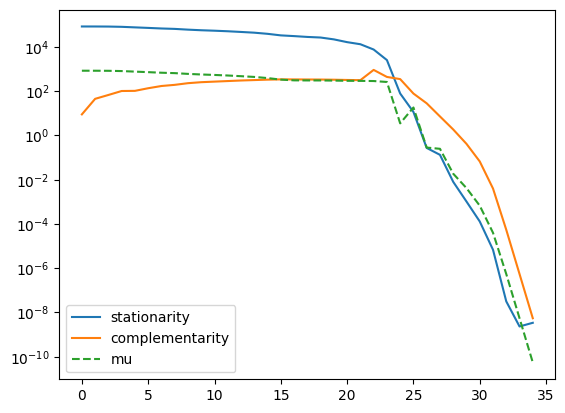

In [5]:
plt.plot(results.history['dual_res'],label = 'stationarity')
plt.plot(results.history['comp_res'],label = 'complementarity')

plt.plot(results.history['mu'],label = 'mu',ls = '--')
plt.yscale('log')
plt.legend()

## Solve an unconstrained logistic regression problem

In [ ]:
f,A,Q,C,c,b = build_random_logistic(m = 10000,n = 500,k = 100,density=0.1, seed = 2)
problem = GLQP(f,A,Q,C=None,c=None,b=b)
x,results = problem.solve()

─────────────────────────────────────────────────────────────────────────────────────────────────────────
| GLQP | Variables: 500  │ Rows in A: 500,000 │ Equality Constraints: 0    │ Inequality Constraints: 0   
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │ lin_rel_res │
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │  3.466e+07 │  1.24e+04 │  0.00e+00 │  1.00e-12 │  1.24e+04 │  1.2e+02 │ 8.0e-01 │ 1.0e+00 │      1 │   4.79s │ 4.6893e-16 │
│    2 │  2.939e+07 │  1.03e+03 │  2.48e-06 │  1.24e+02 │  1.03e+03 │  1.0e+01 │ 1.9e-01 │ 1.0e+00 │      1 │   7.29s │ 2.2417e-16 │
│    3 │  2.921e+07 │  8.90e+00 │  2.27e-06 │  1.03e+01 │  1.03e+01 │  1.0e-01 │ 1.9e-02 │ 1.0e+00 │      1 │   9.80s │ 8.753

## Solve a large L1 regularized logistic regression

───────────────────────────────────────────────────────────────────────────────────────────────────────────
| GLQP | Variables: 5,000 │ Rows in A: 500,000 │ Equality Constraints: 0    │ Inequality Constraints: 5,000
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │ lin_rel_res │
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │  3.466e+06 │  1.08e+03 │  9.84e-03 │  4.27e+00 │  1.08e+03 │  1.1e+01 │ 1.6e+00 │ 1.6e-02 │      1 │   6.94s │ 3.5579e-15 │
│    2 │  3.658e+06 │  9.99e+02 │  9.11e-03 │  1.62e-01 │  9.99e+02 │  1.0e+01 │ 1.5e+00 │ 7.4e-02 │      1 │  12.15s │ 1.7773e-15 │
│    3 │  3.452e+06 │  5.86e+01 │  8.11e-07 │  1.53e+02 │  1.53e+02 │  4.0e+01 │ 3.0e+00 │ 1.0e+00 │      1 │  17.45s │ 1

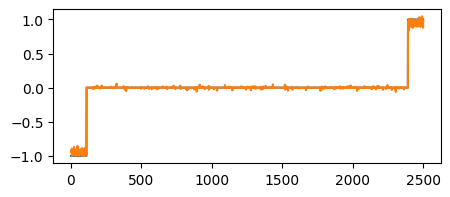

In [7]:
n = 2500
m = 500000
lam = 50.
f,A,Q,C,c,b,x_true = build_logistic_lasso(
    m = m,
    n = n, 
    seed = 2,
    lam = lam,
    weight = 10
    )
problem = GLQP(f=f,A=A,Q=Q,C=C,c=c,b = b)

xt,results = problem.solve(verbose = True)
x = xt[:n]

order = np.argsort(x_true)
plt.figure(figsize=(5,2))
plt.plot(x_true[order],label = 'true signal (sorted)')
plt.plot(x[order],label = 'l1 recovery')

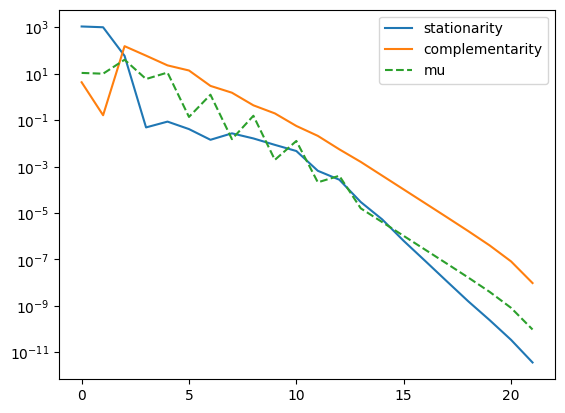

In [8]:
plt.plot(results.history['dual_res'],label = 'stationarity')
plt.plot(results.history['comp_res'],label = 'complementarity')

plt.plot(results.history['mu'],label = 'mu',ls = '--')
plt.yscale('log')
plt.legend()

## Solve a problem with both equality and inequality constraints
Also put some extra settings in

In [9]:
m = 50
n = 100
k = 10

f,A,Q,C,c,b = build_random_logistic(m = m,n = n,k = k,density=0.1, seed = 2)

rng = default_rng(10)
E = csr_array(rng.normal(size = (n//2,n)))
e = np.zeros(E.shape[0])


problem = GLQP(f,A,Q,b,C,c,E = E ,e = e)
settings = SolverSettings()
x,results = problem.solve(verbose = True,mu0 = 1.,settings = settings) 


──────────────────────────────────────────────────────────────────────────────────────────────────────
| GLQP | Variables: 100  │ Rows in A: 50   │ Equality Constraints: 50   │ Inequality Constraints: 10  
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │ lin_rel_res │
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │  3.466e+03 │  1.25e+01 │  8.75e-01 │  4.44e+00 │  1.25e+01 │  1.6e+00 │ 3.5e+00 │ 6.7e-01 │      1 │   0.01s │ 1.1394e-15 │
│    2 │  3.358e+03 │  6.95e-01 │  2.58e-08 │  2.48e+00 │  2.48e+00 │  1.7e-01 │ 2.9e+00 │ 1.0e+00 │      1 │   0.01s │ 1.6875e-15 │
│    3 │  3.346e+03 │  2.06e-02 │  1.96e-08 │  5.19e-01 │  5.19e-01 │  3.4e-01 │ 4.8e-01 │ 9.8e-01 │      1 │   0.02s │ 2.3674e-15 

## Solve a problem with both equality and inequality constraints, where equality constraints are redundent

In [10]:
m = 50
n = 100
k = 10

f,A,Q,C,c,b = build_random_logistic(m = m,n = n,k = k,density=0.1, seed = 2)

rng = default_rng(10)
E = csr_array(np.vstack([np.ones(n)]*20))
e = np.zeros(E.shape[0])


problem = GLQP(f,A,Q,b,C,c,E = E ,e = e)

x,results = problem.solve(verbose = True,mu0 = 1.) 

──────────────────────────────────────────────────────────────────────────────────────────────────────
| GLQP | Variables: 100  │ Rows in A: 50   │ Equality Constraints: 20   │ Inequality Constraints: 10  
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │ lin_rel_res │
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │  3.466e+03 │  2.14e+00 │  2.63e-02 │  4.69e-02 │  2.14e+00 │  2.1e-02 │ 2.3e+00 │ 9.9e-01 │      1 │   0.01s │ 2.1728e-15 │
│    2 │  3.329e+03 │  6.04e-02 │  2.62e-04 │  6.81e-04 │  6.04e-02 │  6.0e-04 │ 3.2e+00 │ 9.9e-01 │      1 │   0.01s │ 1.9439e-13 │
│    3 │  3.328e+03 │  1.75e-04 │  4.70e-07 │  5.21e-05 │  1.75e-04 │  8.8e-06 │ 8.7e+00 │ 1.0e+00 │      1 │   0.02s │ 2.8742e-07 

## Solve a linear system

──────────────────────────────────────────────────────────────────────────────────────────────────────
| GLQP | Variables: 100  │ Rows in A: 0    │ Equality Constraints: 0    │ Inequality Constraints: 0   
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │ refine │  time  │ lin_rel_res │
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │  0.000e+00 │  3.95e-06 │  0.00e+00 │  1.00e-12 │  3.95e-06 │  4.0e-08 │ 2.0e+02 │ 1.0e+00 │      1 │   0.01s │ 2.4144e-12 │
│    2 │ -3.750e+03 │  1.86e-11 │  2.22e-16 │  3.95e-08 │  3.95e-08 │  4.0e-10 │ 7.8e-04 │ 1.0e+00 │      0 │   0.01s │ 1.2659e-07 │
│    3 │ -3.750e+03 │  3.05e-14 │  0.00e+00 │  3.95e-10 │  3.95e-10 │  4.0e-12 │ 1.3e-08 │ 1.0e+00 │      0 │   0.01s │ 8.8081e-12 

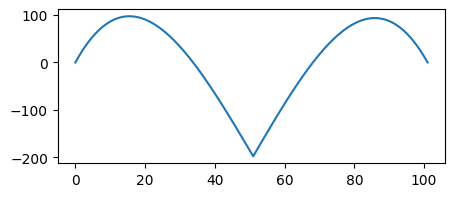

In [11]:
from scipy.sparse.linalg import LaplacianNd
n = 100
Q = -1 * LaplacianNd((n,),boundary_conditions = 'dirichlet').tosparse()
b = np.abs(np.linspace(-1,1,n))
b[n//2] -= 25
problem = GLQP(Q = Q,b = b)

x,results = problem.solve()
plt.figure(figsize=(5,2))
plt.plot(np.hstack([0,x,0]))
plt.show()

## Compare to CVXPY on large L1 problem

In [ ]:
n = 2500
m = 500000
lam = 100.
f,A,Q,C,c,b,x_true = build_logistic_lasso(m = m,n = n, seed = 2,lam = lam)
problem = GLQP(f,A,Q,b,C,c)
xt,results = problem.solve(verbose = True)
x = xt[:n]

order = np.argsort(x_true)
plt.figure(figsize=(5,2))
plt.plot(x_true[order],label = 'true signal (sorted)')
plt.plot(x[order],label = 'l1 recovery')

In [ ]:
import cvxpy as cp
from scipy.sparse import csc_array
A = csc_array(A)[:,:n]
n = A.shape[1]

beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
neg_log_likelihood = cp.sum(
    cp.multiply(f.w,cp.logistic(A @ beta)- cp.multiply(f.y, A @ beta))
)
regularization = lam*cp.norm1(beta)

problem  = cp.Problem(cp.Minimize(
    (neg_log_likelihood + regularization))
)
problem.solve(verbose = True)